<h1>Problem Set 2</h1> 
<h3><center>Time Series</center></h3>
<br>
<center>Pau Belda-i-Tortosa</center>  |
<center>March 2019</center>

<br>
<br>

<h4>Q6.- AR(p) estimation with General-to-Specific selection method. </h4>

<h5> Construct a function that for a given data, i) selects the order k using the General-to-Specific selection method corresponding to an AR specification and ii) estimates the corresponding AR(k) process using OLS. The input of the function should be your data and the maximum lag for the AR. The output should be k and the estimates and variances of the estimates.</h5>

In [1]:
def gts(data,p):
    import numpy as np
    r=0.05
    p_val=0.1
    count=0
    
    while p_val>r:
        k=p-count
        # Dependent variable
        y = data[0+k:]    
        #Matrix of regressors
        ylag=np.empty((len(y),k))
        for j in range(1,k):
            ylag[:,j]=data[0+k-j:-j]
        x=np.ones((len(y),1))
        z=np.concatenate((x,ylag),axis=1)

           
        #Number of periods and regressors
        t= len(z)
        k= len(z)
        
        #Parameter estimates
        a=np.linalg.inv(np.matmul(z.transpose,z))
        b=np.matmul(z.transpose,y)
        phi_hat =np.matmul(a,b)

        #Predicted y
        y_hat = z*phi_hat

        #Residuals
        e_hat = y-y_hat
        
        #Sum of squared residuals
        SSR = e_hat.transpose*e_hat
        
        #Estimate of the variance of the error
        var_e = SSR/(t-k);

        #Variance-covariance matrix of the parameter estimates
        var_cov_phi = var_e*np.linalg.inv(np.matmul(z.transpose,z))
        
        #Test statistical significance (t-test)
        	# calculate the t statistic
        t_stat = (phi_hat[-1]*pow(len(y),0.5))/ np.std(y)
        	# degrees of freedom
        df = len(y) -1
        	# calculate the p-value
        p_val= (1.0 - t.cdf(abs(t_stat), df)) * 2.0
        count=+1
        
    order=p-count
    return phi_hat, var_cov_phi,order

<h4>Q7.- Montecarlo Simulation and OLS properties. </h4>



In [6]:
#Import packages
import numpy as np
import random
import matplotlib.pyplot as plt
import pylab 
import scipy.stats as stats

#Fix the seed
np.random.seed( 10 )
random.seed(10)

#Define a function with the sample size and the true parameter value as inputs
def Montecarlo(phi,n):
    phi_h=[]
    for m in range(1000):
        y=np.empty((n));
        y[0]=1;
        e=np.random.normal(0,1,n)
        for t in range(1,n):
            y[t]=phi*y[t-1] + e[t];
        
        num=np.empty((n))
        den=np.empty((n))
        for t in range(2,n):
            num[t]=y[t]*y[t-1];
            den[t]=y[t-1]*y[t-1];
            
        phi_hat=np.sum(num)/np.sum(den);
        
        phi_h.append(phi_hat);
    return phi_h

phi_1=Montecarlo(0.3,100);
phi_2=Montecarlo(0.8,1000);
phi_3=Montecarlo(0.98,1000);

#There are a few outliers. Remove them!
for t in range(1000):
    if phi_2[t]>2 or phi_2[t]<0.3:
        phi_2[t]=phi_2[t-1];
    if phi_3[t]>2 or phi_3[t]<0.3:
        phi_3[t]=phi_3[t-1];

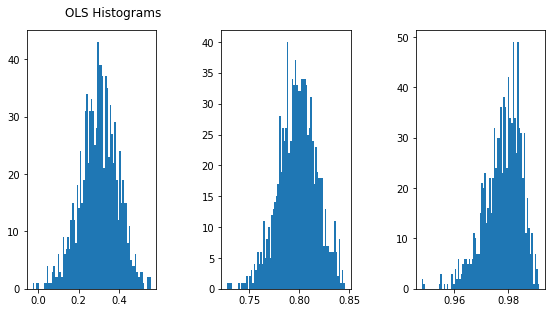

In [8]:
#Graph
plt.figure
plt.subplots_adjust(top=0.9, bottom=0, left=0.3, right=1.5, wspace=0.5)
plt.suptitle('OLS Histograms')
bins=75 #Adjust the number of bins

plt.subplot(1,3,1)
plt.hist(phi_1, bins)

plt.subplot(1,3,2)
plt.hist(phi_2, bins)

plt.subplot(1,3,3)
plt.hist(phi_3, bins)
plt.show()

OLS-Estimators seem to be consistent and normally distributed. However, when the true parameter value approches 1, the distribution is schewed to the left. Then, there is higher probability of being inconsistent. 


**Compute the bias and the mean square error**

In [14]:
bia=np.empty((3))
phi=[0.3,0.8,0.98]
#Average estimator
p_1=sum(phi_1)/1000
p_2=sum(phi_2)/1000
p_3=sum(phi_3)/1000
p=[p_1, p_2, p_3]

for j in range(3):
    bia[j]=p[j]-phi[j]

#Vector of biases
def bias(phi,v,n):
    bias=np.empty((n))
    for j in range(n):
        bias[j]=v[j]-phi
    return bias

bias1=bias(0.3,phi_1,100)
bias2=bias(0.8,phi_2,1000)
bias3=bias(0.98,phi_3,1000)

mse11=np.var(phi_1)+ pow(bia[0],2)
mse12=np.var(phi_2)+ pow(bia[1],2)
mse13=np.var(phi_3)+ pow(bia[2],2)

import pandas as pd
array=np.array([[round(bia[0],4),round(bia[1],4), round(bia[2],4)],[round(mse11,4),round(mse12,4),round(mse13,4)]])
table1=pd.DataFrame(array, index = ['Bias', 'MSE'], columns = ['ϕ=0.3', 'ϕ=0.8', 'ϕ=0.98'])
table1

,ϕ=0.3,ϕ=0.8,ϕ=0.98
Bias,-0.0021,-0.0017,-0.0020
MSE,0.0086,0.0004,0.0001


The bias is computed with respected to the mean of the estimated $\hat{\phi}$. 
As showed in the table, the bias does not change very much when we change either the size of the sample or the true parameter value. As opposed to that, the MSE decrease (significantly?) with both the size and the true parameter value. 

Alternatively, one might plot the distribution of the bias, which unsurpraisingly  reproduces the shape of the OLS estimates.

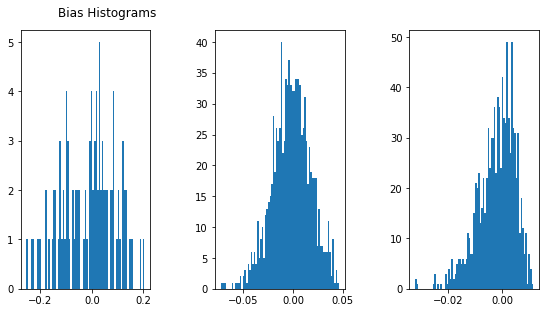

In [19]:
plt.figure
plt.subplots_adjust(top=0.9, bottom=0, left=0.3, right=1.5, wspace=0.5)
plt.suptitle('Bias Histograms')
bins=75 #Adjust the number of bins

plt.subplot(1,3,1)
plt.hist(bias1, bins)

plt.subplot(1,3,2)
plt.hist(bias2, bins)

plt.subplot(1,3,3)
plt.hist(bias3, bins)
plt.show()

**What happens with the approximation to the normal distribution when ϕ approaches 1?**

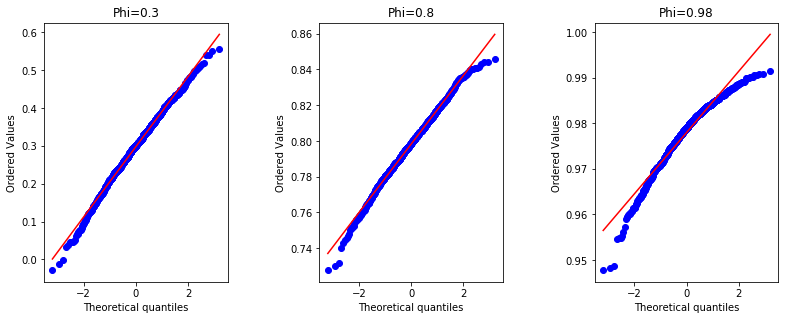

In [17]:
#QQPLOT
plt.figure
plt.subplots_adjust(top=0.9, bottom=0, left=0.3, right=2, wspace=0.5)

plt.subplot(1,3,1)
stats.probplot(phi_1, dist="norm", plot=pylab)
plt.title('Phi=0.3')

plt.subplot(1,3,2)
stats.probplot(phi_2, dist="norm", plot=pylab)
plt.title('Phi=0.8')

plt.subplot(1,3,3)
stats.probplot(phi_3, dist="norm", plot=pylab)
plt.title('Phi=0.98')

pylab.show()

Clearly, when the true parameter value approaches one, the distribution departs from a normal.